<a href="https://colab.research.google.com/github/Francisco2963/LGBM/blob/main/Clasificaci%C3%B3n_utilizando_LightGBM_(LGBM)_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('/content/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [67]:
df.duplicated().sum()

0

In [68]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [69]:
df[df['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [70]:
df[df['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [71]:
Total_perdidos = df.iloc[102:106]
Total_perdidos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
105,LP001367,Male,Yes,1,Graduate,No,3052,1030.0,100.0,360.0,1.0,Urban,Y


In [72]:
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [73]:
df[df['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [74]:
df[df['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [75]:
df[df['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [76]:
df[df['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


COKMENTARIO VALORES Nan

Debido al poco tiempo de entrega de este trabajo he decidido imputar todos los valores NaN con from sklearn.impute import IterativeImputeer ( no hay una rezon especifica del porque usar este metodo), simplemente la encontre en internet y leyendo documentacion de este proceso me parecio una buena idea para imputar los valores NaN debido al poco tiempo que tengo para trabajar en este proyecto.

Informacion recuperada de:

https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

https://krrai77.medium.com/using-fancyimpute-in-python-eadcffece782



In [77]:
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
import pandas as pd

In [78]:
# Obtener las columnas numéricas
columnas_numericas = df.select_dtypes(include='number').columns

# Obtener las columnas categóricas
columnas_categoricas = df.select_dtypes(include='object').columns

imputer = IterativeImputer(random_state=0)

# Imputar columnas numéricas
df_imputado_numerico = imputer.fit_transform(df[columnas_numericas])

# Imputar columnas categóricas
# Aquí, simplemente rellenaremos los valores faltantes con la moda de la columna:
df_imputado_categorico = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])

# Combinar los resultados
df_imputado = pd.concat([pd.DataFrame(df_imputado_numerico, columns=columnas_numericas), df_imputado_categorico], axis=1)

In [79]:
df_imputado.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0


In [80]:
Total_perdidos = df_imputado.iloc[102:106]
Total_perdidos

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
102,13650.0,0.0,202.955736,360.0,1.0,LP001350,Male,Yes,0,Graduate,No,Urban,Y
103,4652.0,3583.0,154.435529,360.0,1.0,LP001356,Male,Yes,0,Graduate,No,Semiurban,Y
104,3816.0,754.0,160.000000,360.0,1.0,LP001357,Male,Yes,0,Graduate,No,Urban,Y
105,3052.0,1030.0,100.000000,360.0,1.0,LP001367,Male,Yes,1,Graduate,No,Urban,Y


In [81]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_ID            614 non-null    object 
 6   Gender             614 non-null    object 
 7   Married            614 non-null    object 
 8   Dependents         614 non-null    object 
 9   Education          614 non-null    object 
 10  Self_Employed      614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [82]:
# Especifica el orden original de las columnas
orden_columnas_original = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                           'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
                           'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
                           'Property_Area', 'Loan_Status']

# Reindexar el DataFrame según el orden original de las columnas
df_imputado = df_imputado.reindex(columns=orden_columnas_original)

# Verifica el nuevo orden de las columnas
df_imputado.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,138.159239,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [83]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
def calcular_outliers(df_imputado, columna):
  if df_imputado[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df_imputado[columna].quantile(0.25)
   Q3 = df_imputado[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df_imputado[(df_imputado[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_ApplicantIncome, Q1_ApplicantIncome, Q3_ApplicantIncome, IQR_ApplicantIncome = calcular_outliers(df_imputado, 'ApplicantIncome')
outliers_CoapplicantIncome, Q1_CoapplicantIncome, Q3_CoapplicantIncome, IQR_CoapplicantIncome = calcular_outliers(df_imputado, 'CoapplicantIncome')
outliers_LoanAmount, Q1_LoanAmount, Q3_LoanAmount, IQR_LoanAmount = calcular_outliers(df_imputado, 'LoanAmount')
outliers_Loan_Amount_Term, Q1_Loan_Amount_Term, Q3_Loan_Amount_Term, IQR_Loan_Amount_Term = calcular_outliers(df_imputado, 'Loan_Amount_Term')
outliers_Credit_History, Q1_Credit_History, Q3_Credit_History, IQR_Credit_History = calcular_outliers(df_imputado, 'Credit_History')



print(f'Outliers en ApplicantIncome: \n{len(outliers_ApplicantIncome)}')

print(f'Outliers en CoapplicantIncome: \n{len(outliers_CoapplicantIncome)}')

print(f'Outliers en LoanAmount: \n{len(outliers_LoanAmount)}')

print(f'Outliers en Loan_Amount_Term: \n{len(outliers_Loan_Amount_Term)}')

print(f'Outliers en Credit_History: \n{len(outliers_Credit_History)}')



Outliers en ApplicantIncome: 
50
Outliers en CoapplicantIncome: 
18
Outliers en LoanAmount: 
41
Outliers en Loan_Amount_Term: 
102
Outliers en Credit_History: 
139


Text(0.5, 0, 'Credit_History')

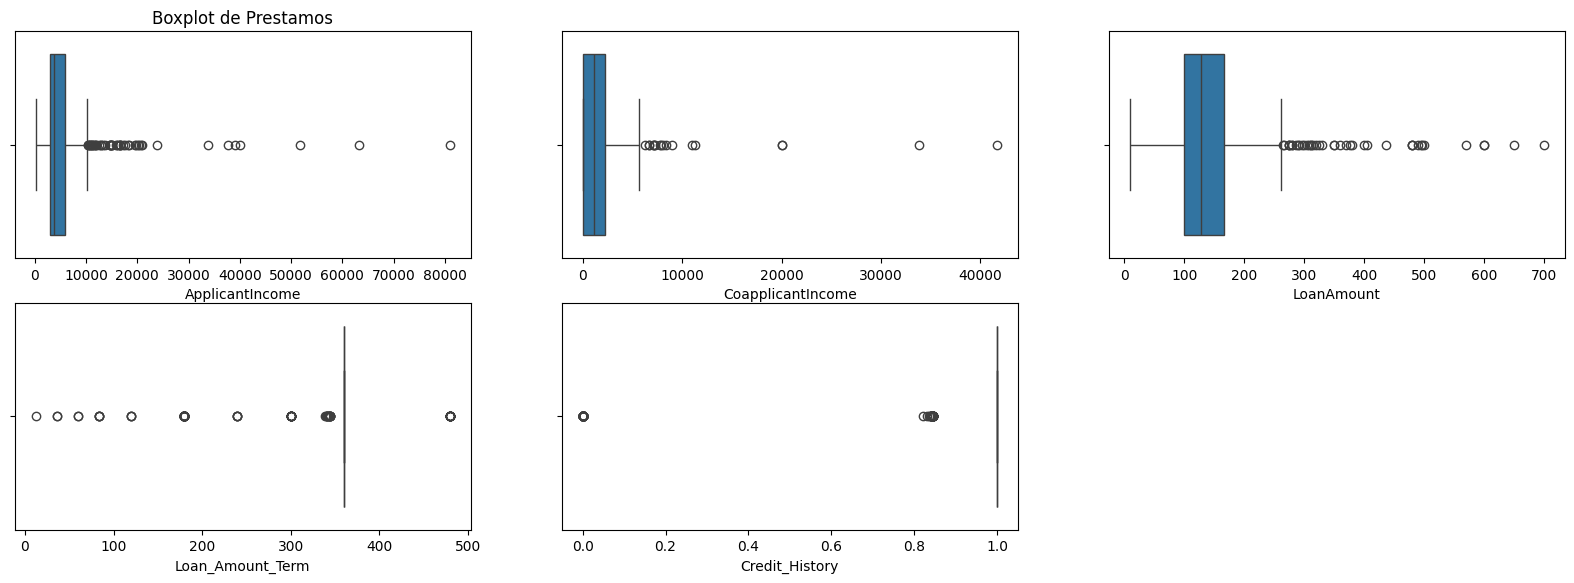

In [86]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df_imputado['ApplicantIncome'])
plt.title('Boxplot de Prestamos')
plt.xlabel('ApplicantIncome')

plt.subplot(3,3,2)
sns.boxplot(x=df_imputado['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome')

plt.subplot(3,3,3)
sns.boxplot(x=df_imputado['LoanAmount'])
plt.xlabel('LoanAmount')

plt.subplot(3,3,4)
sns.boxplot(x=df_imputado['Loan_Amount_Term'])
plt.xlabel('Loan_Amount_Term')

plt.subplot(3,3,5)
sns.boxplot(x=df_imputado['Credit_History'])
plt.xlabel('Credit_History')

In [87]:
df_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.248056,84.285192,9.0,100.25,128.0,165.75,700.0
Loan_Amount_Term,614.0,342.011865,64.373076,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842231,0.349683,0.0,1.00,1.0,1.00,1.0


In [88]:
# Calcular el IQR
Q1 = df_imputado['ApplicantIncome'].quantile(0.25)
Q3 = df_imputado['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y extraer los outliers
outliers = df_imputado[(df_imputado['ApplicantIncome'] < lower_bound) | (df_imputado['ApplicantIncome'] > upper_bound)]

# Mostrar los valores de los outliers
print(outliers['ApplicantIncome'])

9      12841.0
34     12500.0
54     11500.0
67     10750.0
102    13650.0
106    11417.0
115    14583.0
119    10408.0
126    23803.0
128    10513.0
130    20166.0
138    14999.0
144    11757.0
146    14866.0
155    39999.0
171    51763.0
183    33846.0
185    39147.0
191    12000.0
199    11000.0
254    16250.0
258    14683.0
271    11146.0
278    14583.0
284    20667.0
308    20233.0
324    15000.0
333    63337.0
369    19730.0
370    15759.0
409    81000.0
424    14880.0
432    12876.0
438    10416.0
443    37719.0
467    16692.0
475    16525.0
478    16667.0
483    10833.0
487    18333.0
493    17263.0
506    20833.0
509    13262.0
525    17500.0
533    11250.0
534    18165.0
561    19484.0
572    16666.0
594    16120.0
604    12000.0
Name: ApplicantIncome, dtype: float64


In [89]:
outliers = df_imputado.iloc[408:410]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
408,LP002315,Male,Yes,1,Graduate,No,8300.0,0.0,152.0,300.0,0.0,Semiurban,N
409,LP002317,Male,Yes,3+,Graduate,No,81000.0,0.0,360.0,360.0,0.0,Rural,N


In [90]:
df_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.248056,84.285192,9.0,100.25,128.0,165.75,700.0
Loan_Amount_Term,614.0,342.011865,64.373076,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842231,0.349683,0.0,1.00,1.0,1.00,1.0


In [91]:
# Calcular el percentil 95 para las columnas deseadas
percentile_95_ApplicantIncome = df_imputado['ApplicantIncome'].quantile(0.95)
percentile_95_CoapplicantIncome = df_imputado['CoapplicantIncome'].quantile(0.95)

# Eliminar los outliers por encima del percentil 95
df_imputado = df_imputado[df_imputado['ApplicantIncome'] <= percentile_95_ApplicantIncome]
df_imputado = df_imputado[df_imputado['CoapplicantIncome'] <= percentile_95_CoapplicantIncome]

In [92]:
df_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,555.0,4399.376577,2362.433194,150.0,2833.0,3707.0,5300.5,14583.0
CoapplicantIncome,555.0,1239.390847,1339.981396,0.0,0.0,1086.0,2158.5,4996.0
LoanAmount,555.0,133.191110,57.630687,9.0,100.0,125.0,158.0,496.0
Loan_Amount_Term,555.0,342.694208,63.913623,12.0,360.0,360.0,360.0,480.0
Credit_History,555.0,0.840133,0.352576,0.0,1.0,1.0,1.0,1.0


Text(0.5, 0, 'Credit_History')

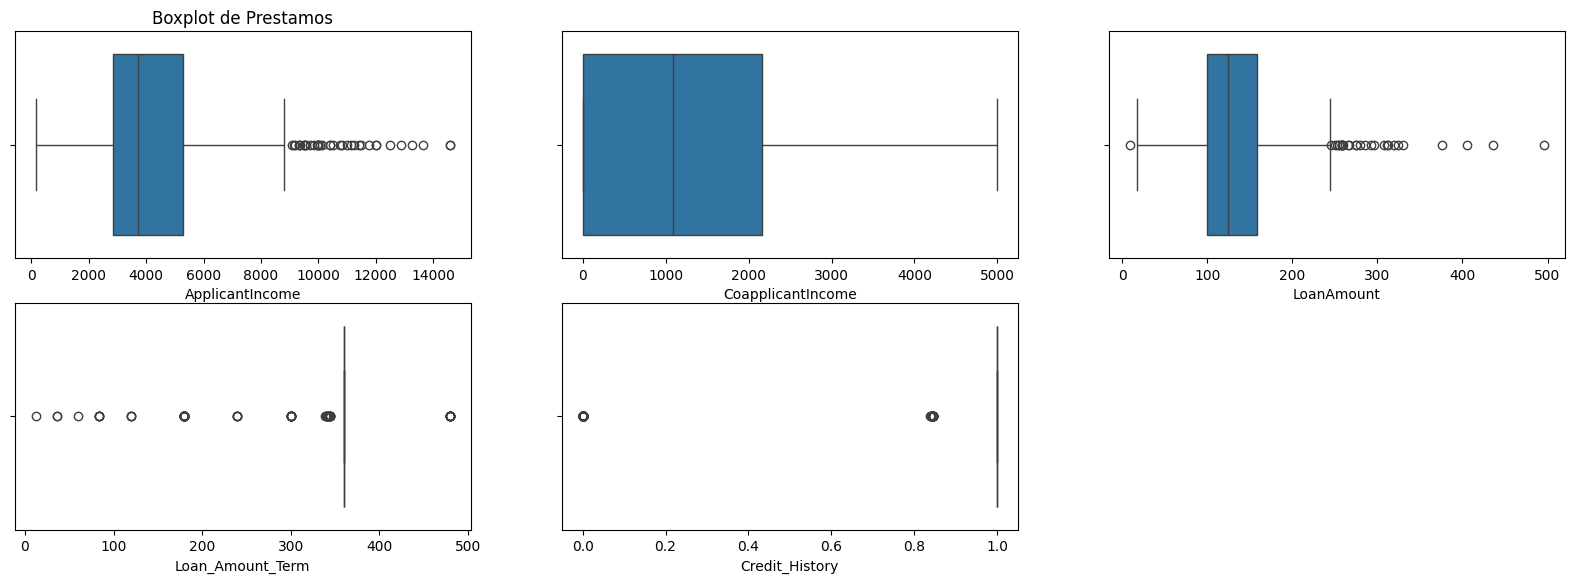

In [93]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df_imputado['ApplicantIncome'])
plt.title('Boxplot de Prestamos')
plt.xlabel('ApplicantIncome')

plt.subplot(3,3,2)
sns.boxplot(x=df_imputado['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome')

plt.subplot(3,3,3)
sns.boxplot(x=df_imputado['LoanAmount'])
plt.xlabel('LoanAmount')

plt.subplot(3,3,4)
sns.boxplot(x=df_imputado['Loan_Amount_Term'])
plt.xlabel('Loan_Amount_Term')

plt.subplot(3,3,5)
sns.boxplot(x=df_imputado['Credit_History'])
plt.xlabel('Credit_History')

COMENTARIO OUTLIERS

Hemos eliminado todos los valores atipicos de la columna ApplicantIncome y de la columna CoapplicantIncome.

Al eliminar los valores que están por encima del percentil 95, estaremos asegurando que solo el 5% superior de los datos sea considerado como outlier y eliminado. Porque se consideran outliers estos valores por sobre el percentil 95?. Por ejempolo el valor maximo en la columna ApplicantIncome era de 81000 y al comparar este valor con otra fila con similares caracteristicas, la diferencia era muy grande entre los valores para la misma columna, e spor esta razon que lo considere un error de digitacion en el valor y opte por elimiarlo de los datos.

In [124]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            555 non-null    object 
 1   Gender             555 non-null    object 
 2   Married            555 non-null    object 
 3   Dependents         555 non-null    object 
 4   Education          555 non-null    object 
 5   Self_Employed      555 non-null    object 
 6   ApplicantIncome    555 non-null    float64
 7   CoapplicantIncome  555 non-null    float64
 8   LoanAmount         555 non-null    float64
 9   Loan_Amount_Term   555 non-null    float64
 10  Credit_History     555 non-null    float64
 11  Property_Area      555 non-null    object 
 12  Loan_Status        555 non-null    object 
dtypes: float64(5), object(8)
memory usage: 60.7+ KB


In [125]:
df_imputado = df_imputado.reset_index(drop=True)

In [126]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            555 non-null    object 
 1   Gender             555 non-null    object 
 2   Married            555 non-null    object 
 3   Dependents         555 non-null    object 
 4   Education          555 non-null    object 
 5   Self_Employed      555 non-null    object 
 6   ApplicantIncome    555 non-null    float64
 7   CoapplicantIncome  555 non-null    float64
 8   LoanAmount         555 non-null    float64
 9   Loan_Amount_Term   555 non-null    float64
 10  Credit_History     555 non-null    float64
 11  Property_Area      555 non-null    object 
 12  Loan_Status        555 non-null    object 
dtypes: float64(5), object(8)
memory usage: 56.5+ KB


<Figure size 1400x800 with 0 Axes>

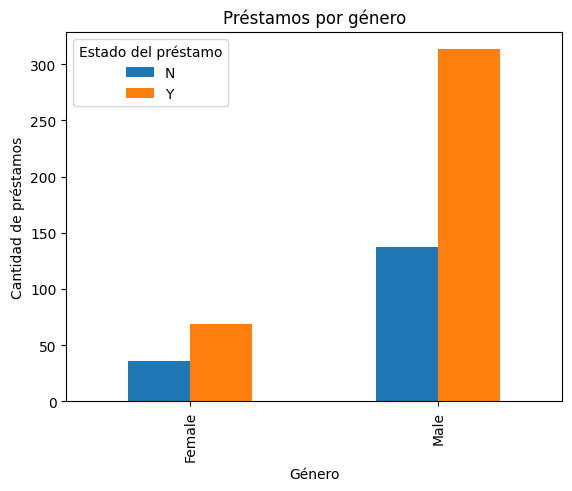

In [127]:
# Agrupación por género y cálculo de estadísticas
grouped_by_gender = df_imputado.groupby('Gender')['Loan_Status'].value_counts().unstack()

# Gráfico de barras
plt.figure(figsize=(14, 8))
grouped_by_gender.plot(kind='bar')
plt.title('Préstamos por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de préstamos')
plt.legend(title='Estado del préstamo')
plt.show()


COMENTARIO DEL GRAFICO

El grafico muuestra la distribucion de prestamos por genero, podemos ver que los prestamos son otorgados en mayor medida a los hombres.

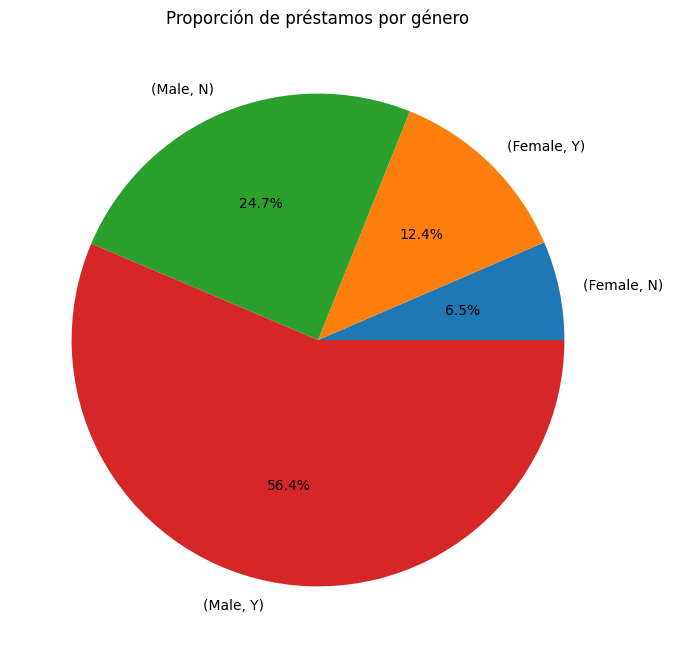

In [128]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
grouped_by_gender.stack().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de préstamos por género')
plt.ylabel('')
plt.show()

COMENTARIO DEL GRAFICO

Siguiendo con el otorgamiento del prestamo a hombres y mujeroes, este grafico muestra los porcentajes de aprobacion y rechazo entre hombres y mujeres , siendo el 56,4% de aprobacion para hombres y un 12,5% de aprobacion para mujeres

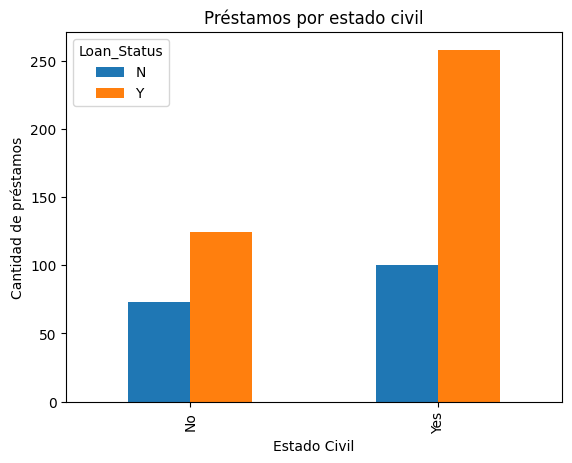

In [129]:
# Agrupación por estado civil y cálculo de estadísticas
grouped_by_marital_status = df_imputado.groupby('Married')['Loan_Status'].value_counts().unstack()

# Gráfico de barras
grouped_by_marital_status.plot(kind='bar')
plt.title('Préstamos por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de préstamos')
plt.show()




COMENTARIO

El grafico muestra que las personas casadas tienen una mejor valoracion para la entrega del prestamo

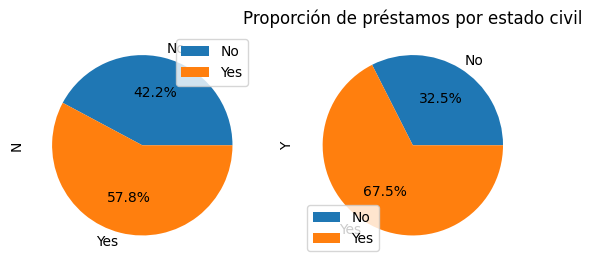

In [130]:
# Gráfico de pastel
grouped_by_marital_status.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.title('Proporción de préstamos por estado civil')
plt.show()

COMENTARIO DEL GRAFICO

Podemos ver en el grafico la proporcion de entrega de prestamos, por ejemplo para las personas casadas el porcentaje de aprobacion es de un67,5% y para las personas que no son casadas el porcentaje de aprobacion es de 57,8%

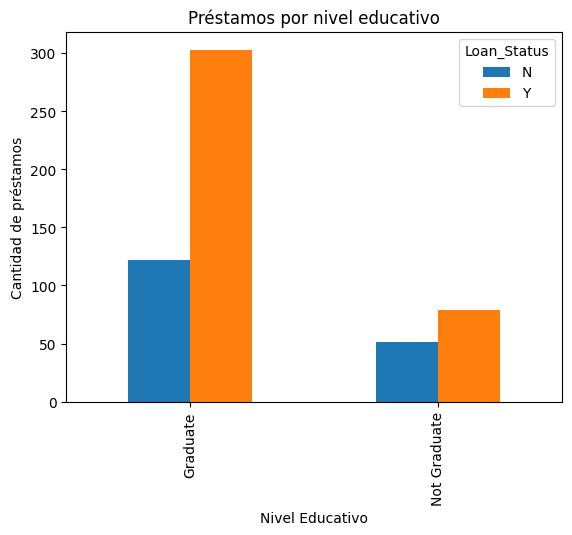

In [131]:
# Agrupación por nivel educativo y cálculo de estadísticas
grouped_by_education = df_imputado.groupby('Education')['Loan_Status'].value_counts().unstack()

# Gráfico de barras
grouped_by_education.plot(kind='bar')
plt.title('Préstamos por nivel educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de préstamos')
plt.show()



COMENTARIO DEL GRAFICO

El grafico indica que las personas graduadas tienen mejor valoracion al momento de entregar un prestamo, lo interesante de este grafico, es que las personas que no son graduadas el porcentaje de aprobacion o rechazo es casi el mismo.

In [132]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            555 non-null    object 
 1   Gender             555 non-null    object 
 2   Married            555 non-null    object 
 3   Dependents         555 non-null    object 
 4   Education          555 non-null    object 
 5   Self_Employed      555 non-null    object 
 6   ApplicantIncome    555 non-null    float64
 7   CoapplicantIncome  555 non-null    float64
 8   LoanAmount         555 non-null    float64
 9   Loan_Amount_Term   555 non-null    float64
 10  Credit_History     555 non-null    float64
 11  Property_Area      555 non-null    object 
 12  Loan_Status        555 non-null    object 
dtypes: float64(5), object(8)
memory usage: 56.5+ KB


In [133]:
correlation_matrix = df_imputado[["ApplicantIncome","CoapplicantIncome","LoanAmount",
                               "Loan_Amount_Term","Credit_History"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.259481    0.587441   
CoapplicantIncome        -0.259481           1.000000    0.216061   
LoanAmount                0.587441           0.216061    1.000000   
Loan_Amount_Term         -0.061188           0.015857    0.094607   
Credit_History            0.050101          -0.034847    0.009058   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.061188        0.050101  
CoapplicantIncome          0.015857       -0.034847  
LoanAmount                 0.094607        0.009058  
Loan_Amount_Term           1.000000        0.001773  
Credit_History             0.001773        1.000000  


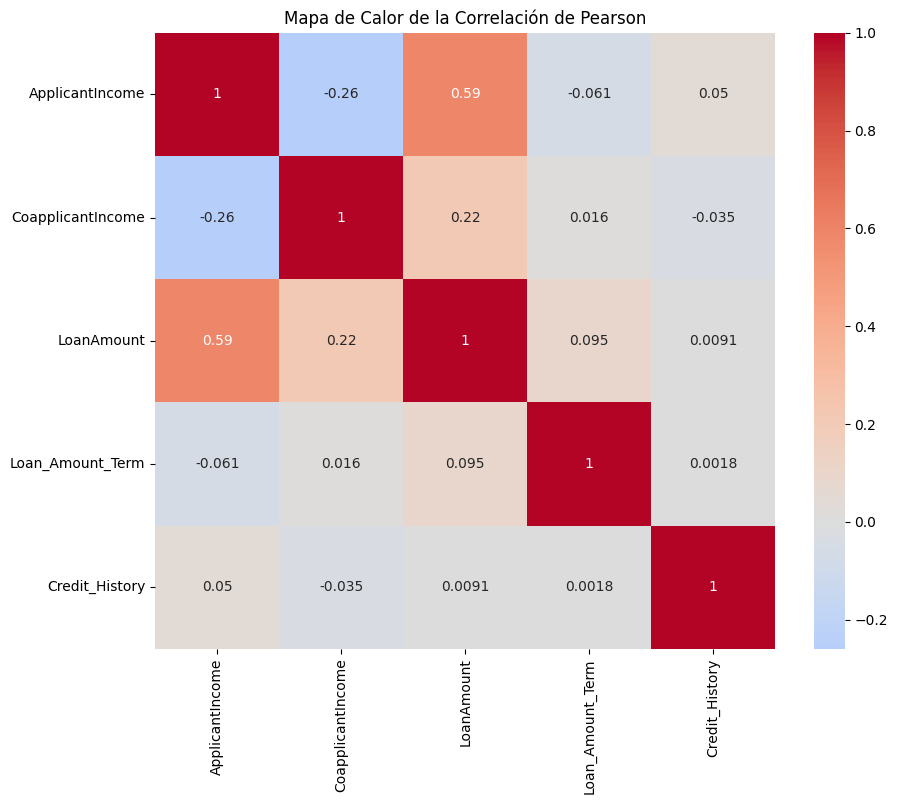

In [134]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO DEL MAPA DE CALOR

Correlación positiva fuerte:

ApplicantIncome y LoanAmount: Existe una fuerte correlación positiva entre el ingreso del solicitante y el monto del préstamo. Esto es lógico, ya que a mayor ingreso, es más probable que se apruebe un préstamo de mayor valor.


Correlación débil o nula:

Loan_Amount_Term y Credit_History: La correlación entre el plazo del préstamo y el historial crediticio es muy débil. Esto sugiere que estas dos variables no están fuertemente relacionadas entre sí.

# PREPROCESAMIENTO

In [135]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            555 non-null    object 
 1   Gender             555 non-null    object 
 2   Married            555 non-null    object 
 3   Dependents         555 non-null    object 
 4   Education          555 non-null    object 
 5   Self_Employed      555 non-null    object 
 6   ApplicantIncome    555 non-null    float64
 7   CoapplicantIncome  555 non-null    float64
 8   LoanAmount         555 non-null    float64
 9   Loan_Amount_Term   555 non-null    float64
 10  Credit_History     555 non-null    float64
 11  Property_Area      555 non-null    object 
 12  Loan_Status        555 non-null    object 
dtypes: float64(5), object(8)
memory usage: 56.5+ KB


In [136]:
df_imputado.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,138.159239,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [137]:
columna_a_eliminar = ['Loan_ID',"Property_Area","Loan_Status"]
df_imputado = df_imputado.drop(columna_a_eliminar, axis=1)

In [138]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             555 non-null    object 
 1   Married            555 non-null    object 
 2   Dependents         555 non-null    object 
 3   Education          555 non-null    object 
 4   Self_Employed      555 non-null    object 
 5   ApplicantIncome    555 non-null    float64
 6   CoapplicantIncome  555 non-null    float64
 7   LoanAmount         555 non-null    float64
 8   Loan_Amount_Term   555 non-null    float64
 9   Credit_History     555 non-null    float64
dtypes: float64(5), object(5)
memory usage: 43.5+ KB


In [139]:
!pip install lightgbm

In [142]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 12.7 MB/s eta 0:00:00


In [162]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [163]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [164]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             555 non-null    object 
 1   Married            555 non-null    object 
 2   Dependents         555 non-null    object 
 3   Education          555 non-null    object 
 4   Self_Employed      555 non-null    object 
 5   ApplicantIncome    555 non-null    float64
 6   CoapplicantIncome  555 non-null    float64
 7   LoanAmount         555 non-null    float64
 8   Loan_Amount_Term   555 non-null    float64
 9   Credit_History     555 non-null    float64
dtypes: float64(5), object(5)
memory usage: 43.5+ KB


In [165]:
y = df_imputado['Gender']
X = df_imputado.drop('Gender', axis = 'columns')

In [166]:
X

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,No,0,Graduate,No,5849.0,0.0,138.159239,360.0,1.0
1,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0
2,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0
3,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0
4,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...
550,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0
551,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0
552,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0
553,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0


In [167]:
y

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
550,Female
551,Male
552,Male
553,Male


In [168]:
label = LabelEncoder()
y = label.fit_transform(y)

In [169]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [170]:
# Dividimos los datos en conjunto de entrenamiemto y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [171]:
# Columnas numéricas
variables_num = X_train.select_dtypes(include=['float64']).columns.tolist()


# Transformer para las columnas numéricas
num_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)


# Columnas categóricas
variables_cat = ["Married","Dependents","Education","Self_Employed"]

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Codificación categórica
    ]
)

# Se incluye un ColumnTransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, variables_num),           # Transformaciones numéricas
        ("cat", cat_transformer, variables_cat),           # Transformaciones categóricas

    ],
    remainder="passthrough",  # Dejar columnas que no se transforman como están
    n_jobs=-1,                # Usar todos los núcleos disponibles
    verbose=True,             # Mostrar información sobre el procesamiento
    sparse_threshold=0.3      # Determina el umbral para matrices dispersas
)

In [172]:

model_lgbm = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

pipe_lgbm = Pipeline(steps=[("pp", preprocessor),
                            ("model", model_lgbm)])



In [173]:
# Entrenar el modelo

pipe_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 317, number of negative: 71
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('pp',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married', 'Dependents',
                                                   'Education',
                                                   'Self_Employed'])],
                                   verbose=True)),
                ('model',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

In [174]:
# Realizar Predicciones
y_pred_lgbm = pipe_lgbm.predict(X_test)

In [175]:
# Probabilidades para LightGBM
y_prob_lgbm = pipe_lgbm.predict_proba(X_test)[:, 1]

# MODELO

Exactitud: 0.7664670658682635
Exactitud: 0.7664670658682635
Reporte de Clasificacion por lgbm
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        34
           1       0.87      0.83      0.85       133

    accuracy                           0.77       167
   macro avg       0.65      0.67      0.66       167
weighted avg       0.78      0.77      0.77       167



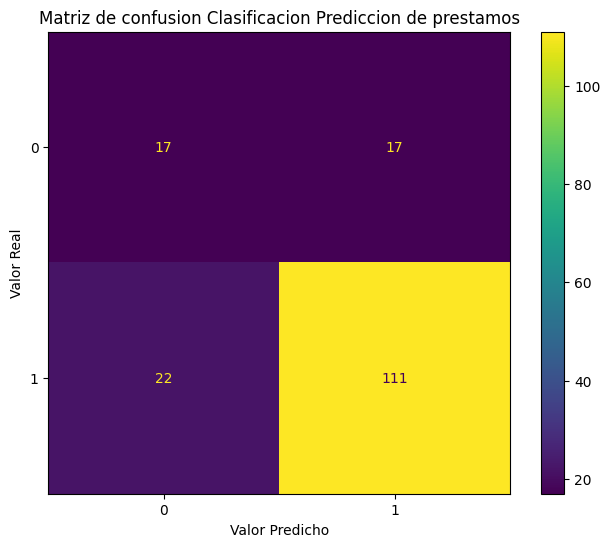

In [187]:
score_lgbm = pipe_lgbm.score(X_test, y_test)
print(f'Exactitud: {score_lgbm}')
y_prob_lgbm = pipe_lgbm.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f'Exactitud: {accuracy}')

cm=confusion_matrix(y_test,y_pred_lgbm)
print("Reporte de Clasificacion por lgbm")
print(classification_report(y_test,y_pred_lgbm))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de prestamos')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

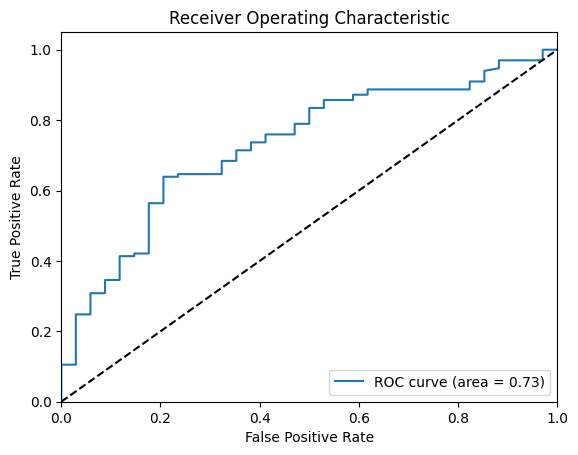

In [178]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgbm)
auc = roc_auc_score(y_test, y_prob_lgbm)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Optimización con GridSearchCV

In [179]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [180]:
X_train = pd.get_dummies(X_train)
model_lgbm = lgb.LGBMClassifier()

In [181]:
# Definir el espacio de hiperparámetros
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.7, 0.8, 0.9]
}

In [182]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 317, number of negative: 71
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817010 -> initscore=1.496222
[LightGBM] [Info] S

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [183]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.7}


In [184]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_lgbm))

Exactitud del mejor modelo: 0.7664670658682635
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        34
           1       0.87      0.83      0.85       133

    accuracy                           0.77       167
   macro avg       0.65      0.67      0.66       167
weighted avg       0.78      0.77      0.77       167



Matriz de Confusión:
[[ 17  17]
 [ 22 111]]


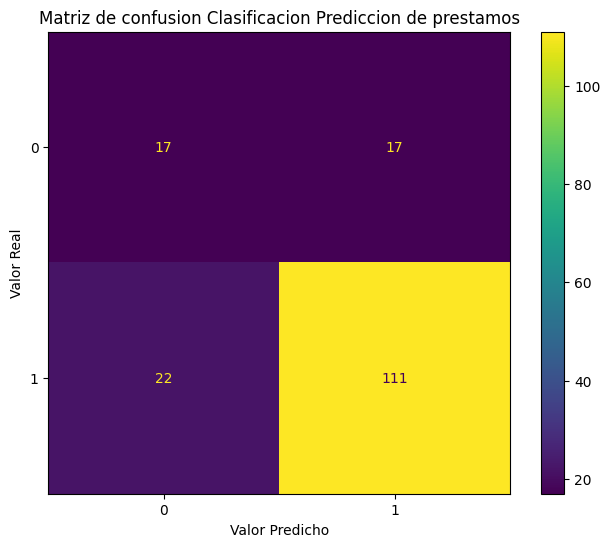

In [186]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
print('Matriz de Confusión:')
print(conf_matrix)
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de prestamos')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

COMENTARIO FINAL

La optimizacion con GridSearchSV no tuvo mejoras en el rendimiento del modelo, se mantuvo igual.

Los resultados del modelo son

1. Exactitud (Accuracy):

Exactitud: 0.77 significa que el modelo predijo correctamente el 76.6% de los casos. Es decir, en un conjunto de datos de 167 ejemplos, el modelo acertó en 128 de ellos (111 + 17).

2. Reporte de Clasificación:

El reporte de clasificación incluye las métricas de precision, recall y f1-score para cada clase, así como para las métricas macro y ponderadas.

Clase 0 (negativa):

Precisión (precision): 0.44 (de todas las veces que el modelo predijo 0, el 44% fueron correctas).

Recall (sensibilidad): 0.50 (el modelo identificó correctamente el 50% de los ejemplos que eran verdaderamente 0).

F1-score: 0.47 (un balance entre precisión y recall).

Clase 1 (positiva):

Precisión: 0.87 (el 87% de las veces que el modelo predijo 1, fue correcto).

Recall: 0.83 (el 83% de los ejemplos de clase 1 fueron correctamente identificados).

F1-score: 0.85 (un buen balance entre precisión y recall).


 Matriz de Confusión:
La matriz de confusión te muestra cómo se distribuyen las predicciones correctas e incorrectas del modelo:

Clase 0 (fila 1):

17 ejemplos fueron correctamente clasificados como 0 (verdaderos negativos).

17 ejemplos fueron incorrectamente clasificados como 1 (falsos positivos).

Clase 1 (fila 2):

111 ejemplos fueron correctamente clasificados como 1 (verdaderos positivos).

22 ejemplos de clase 1 fueron incorrectamente clasificados como 0 (falsos negativos).